In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


# IBM employee attrition analysis

# Welcome to my notebook!

Description: This is a fictional dataset created by the data scientists at IBM. From this dataset we try to extract some insights on the possible reason as to why attrition happens. 

# The tasks involved are 
1. Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.
2. Exploring the dataset and examining if data set requires cleaning
3. Find age distribution of employees 
4. Visualise different factors
5. Comparing data of the employees who left the organisation with the data of employees who didn't
6. Trying to analyse around Job Satisfaction
7. Conclusion


# 1. Importing libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


# Loading the dataset

In [3]:
df = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# 2. Exploring the dataset and examining if data set requires cleaning.

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# The following columns describe the following: 
Education - 1-'Below College'
2-'College'
3-'Bachelor'
4-'Master'
5-'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# The data doesn't contain any null values

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
df.shape

(1470, 35)

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**We will replace the values in columns of Education with the detalied values**

In [9]:
df['Education'].unique()

array([2, 1, 4, 3, 5])

In [10]:
df['Education'] = df['Education'].replace([1,2,3,4,5],['Below College','College', 'Bachelor', 'Master', 'Doctor'])


# 3. Finding the age distribution of the employees

In [11]:
df['age_decade'] = df['Age']//10*10

df = df.assign(Age_decade = df['age_decade'])


In [12]:
df['age_decade'] = df['age_decade'].replace([10.0, 20.0, 30.0, 40.0, 50.0, 60.0],['10s','20s', '30s', '40s', '50s', '60s'])

In [13]:
df['age_decade'].shape

(1470,)

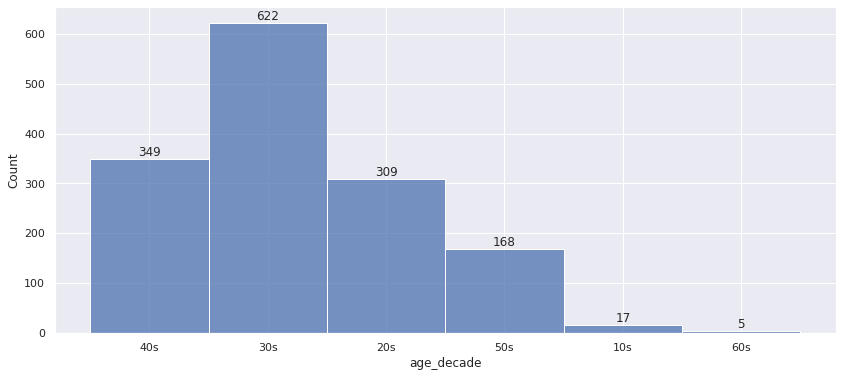

In [14]:
plt.figure(figsize=(14,6))
sns.set_theme(style = 'darkgrid')
ax = sns.histplot(data = df, x = df["age_decade"], binwidth = 10, palette = 'rocket')
for i in ax.containers:
        ax.bar_label(i,)

**We have converted the age into their decades and then add those values in a seperate column**

# 4.  Visualise different factors

**1.Attrition by age group**

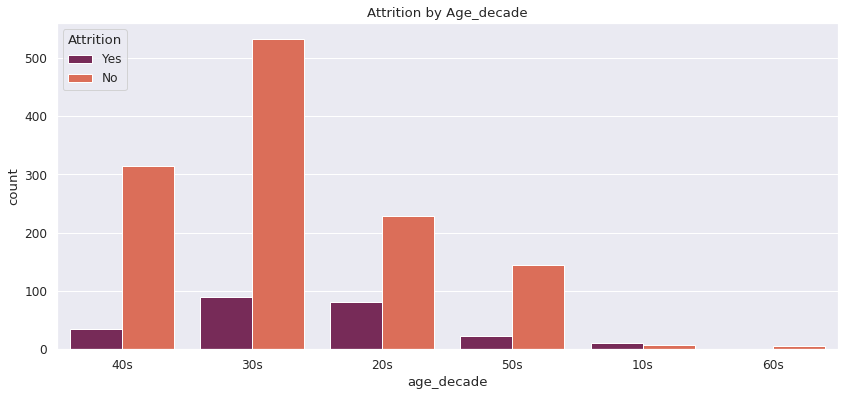

In [15]:

plt.figure(figsize=(14,6))
sns.set_theme(style="darkgrid", font_scale = 1.1)
g =sns.countplot(data=df, x='age_decade', hue='Attrition', palette='rocket').set_title('Attrition by Age_decade');




**2. Attrition by Gender**

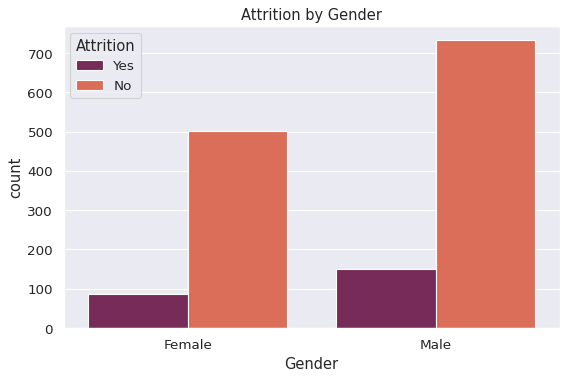

In [16]:
plt.figure(figsize=(8,5), dpi=80)
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=df, x='Gender', hue='Attrition', palette='rocket').set_title('Attrition by Gender');

**3. Attrition by Department**

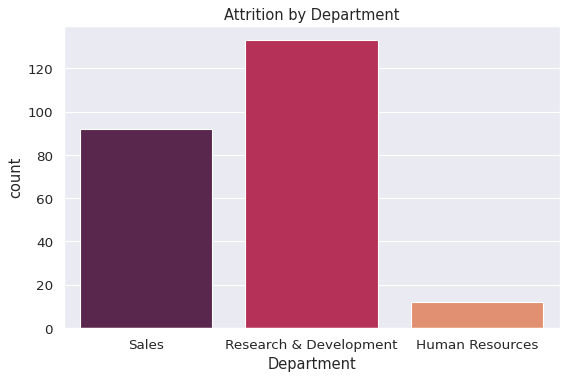

In [17]:
plt.figure(figsize=(8,5), dpi=80)
sns.set_theme(style="darkgrid", font_scale = 1.1)
ax = sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='Department', palette='rocket').set_title('Attrition by Department');

**4. Attrition by education**

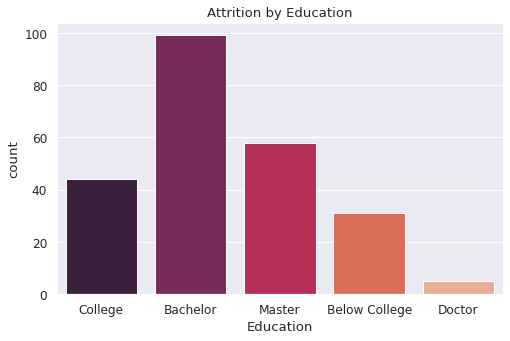

In [18]:
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='Education',palette='rocket').set_title('Attrition by Education');

**5. Attrition by education field**

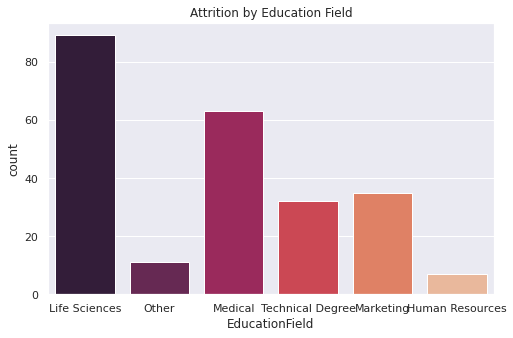

In [19]:
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid", font_scale = 1)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='EducationField',palette='rocket').set_title('Attrition by Education Field');

# 5. Comparing data of the employees who left the organisation with the data of employees who didn't

**We will first create two dataframes, one with employees who left the company and other with employees who didn't**

In [20]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

**We will name the dataframe for the employees who left the company as dfY**

In [21]:
dfY =  df.loc[df['Attrition'] == 'Yes']

In [22]:
dfY.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_decade,Age_decade
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,40s,40
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,0,7,3,3,0,0,0,0,30s,30
14,28,Yes,Travel_Rarely,103,Research & Development,24,Bachelor,Life Sciences,1,19,...,0,6,4,3,4,2,0,3,20s,20
21,36,Yes,Travel_Rarely,1218,Sales,9,Master,Life Sciences,1,27,...,0,10,4,3,5,3,0,3,30s,30
24,34,Yes,Travel_Rarely,699,Research & Development,6,Below College,Medical,1,31,...,0,8,2,3,4,2,1,3,30s,30


**We will name the dataframe who did not leave the company as dfN**

In [23]:
dfN = df[df['Attrition'] == 'No']

In [24]:
dfN.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_decade,Age_decade
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,40s,40
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,30s,30
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,1,6,3,3,2,2,2,2,20s,20
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,1,8,...,0,8,2,2,7,7,3,6,30s,30
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,1,10,...,3,12,3,2,1,0,0,0,50s,50


**We will try to compare certain factors and try to find an insight into the possibilities of reasons why attrition takes place.**

In [25]:
dfsatisfactionY = dfY[['JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance' ]]

In [26]:
dfsatisfactionY.describe()

,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction,WorkLifeBalance
count,237.000000,237.000000,237.000000,237.000000
mean,2.468354,2.599156,2.464135,2.658228
std,1.118058,1.125437,1.169791,0.816453
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000


In [27]:
dfsatisfactionN = dfN[['JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance' ]]

In [28]:
dfsatisfactionN.describe()

,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction,WorkLifeBalance
count,1233.000000,1233.000000,1233.000000,1233.000000
mean,2.778589,2.733982,2.771290,2.781022
std,1.093277,1.071603,1.071132,0.681907
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000


In [29]:
dfY['JobSatisfaction'].value_counts()

3    73
1    66
4    52
2    46
Name: JobSatisfaction, dtype: int64

In [30]:
dfN['JobSatisfaction'].value_counts()

4    407
3    369
2    234
1    223
Name: JobSatisfaction, dtype: int64

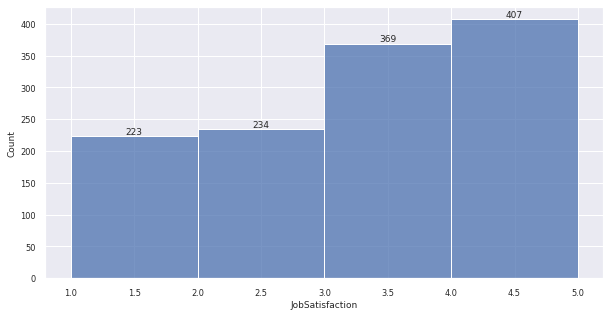

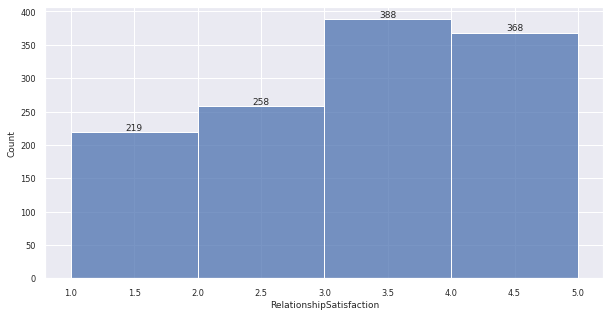

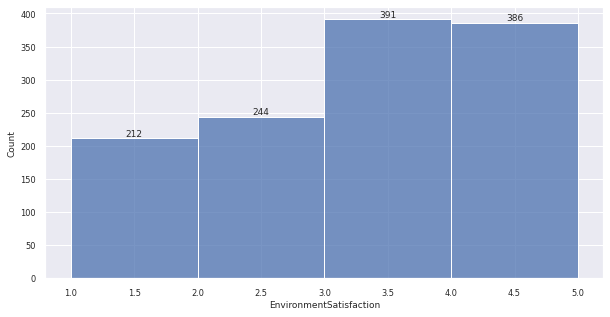

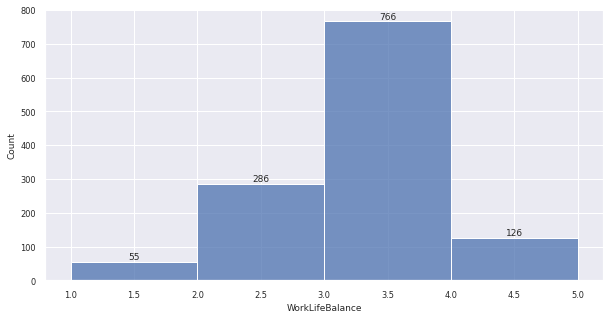

In [31]:
for col in dfsatisfactionN.columns:
    plt.figure(figsize=(10,5))
    sns.set_theme(style="darkgrid", font_scale = 0.75)
    ax = sns.histplot(data = dfsatisfactionN, x = col, binwidth = 1, binrange = (1,5),legend = True, palette = 'rocket')
    for i in ax.containers:
        ax.bar_label(i,)

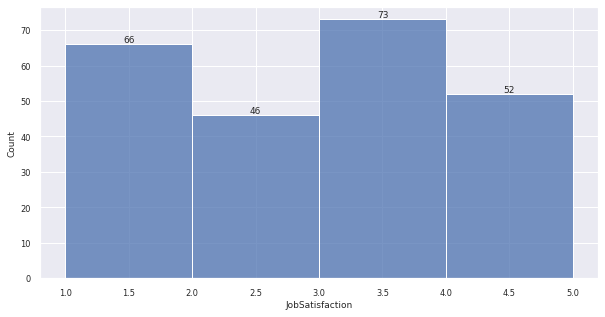

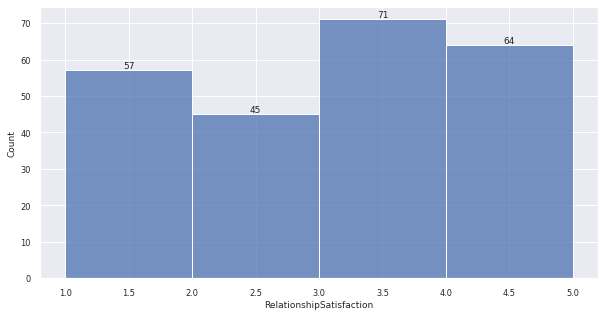

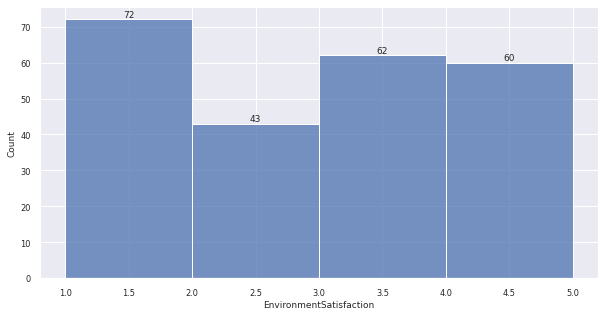

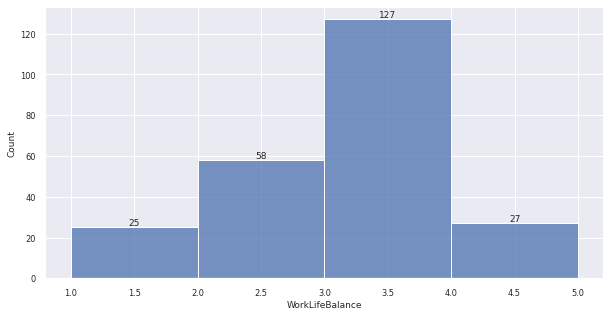

In [32]:
for col in dfsatisfactionY.columns:
    plt.figure(figsize=(10,5))
    sns.set_theme(style="darkgrid", font_scale = 0.75)
    ax = sns.histplot(data = dfsatisfactionY, x = col, binwidth = 1, binrange = (1,5),legend = True, palette = 'rocket')
    for i in ax.containers:
        ax.bar_label(i,)

# **Comparing the two histograms for satisfaction levels for different factors for the employees atthe company, following insights can be draw**
1. For the employees who didn't leave the organisation, the Job, Relationship, Environment satisfaction where largely above 3
2. For the employees who left the organisation, the Job, Relationship and Environment satisfaction where largely below 3
3. The overall worklife balance at the company seems to be decent since no major trend can be seen in both the group of employees.  

In [33]:
df["PerformanceRating"].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

**The performance rating for the employees have been very good, so that factor can be excluded from the analysis**

In [34]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

# 6. Trying to analyse around Job Satisfaction

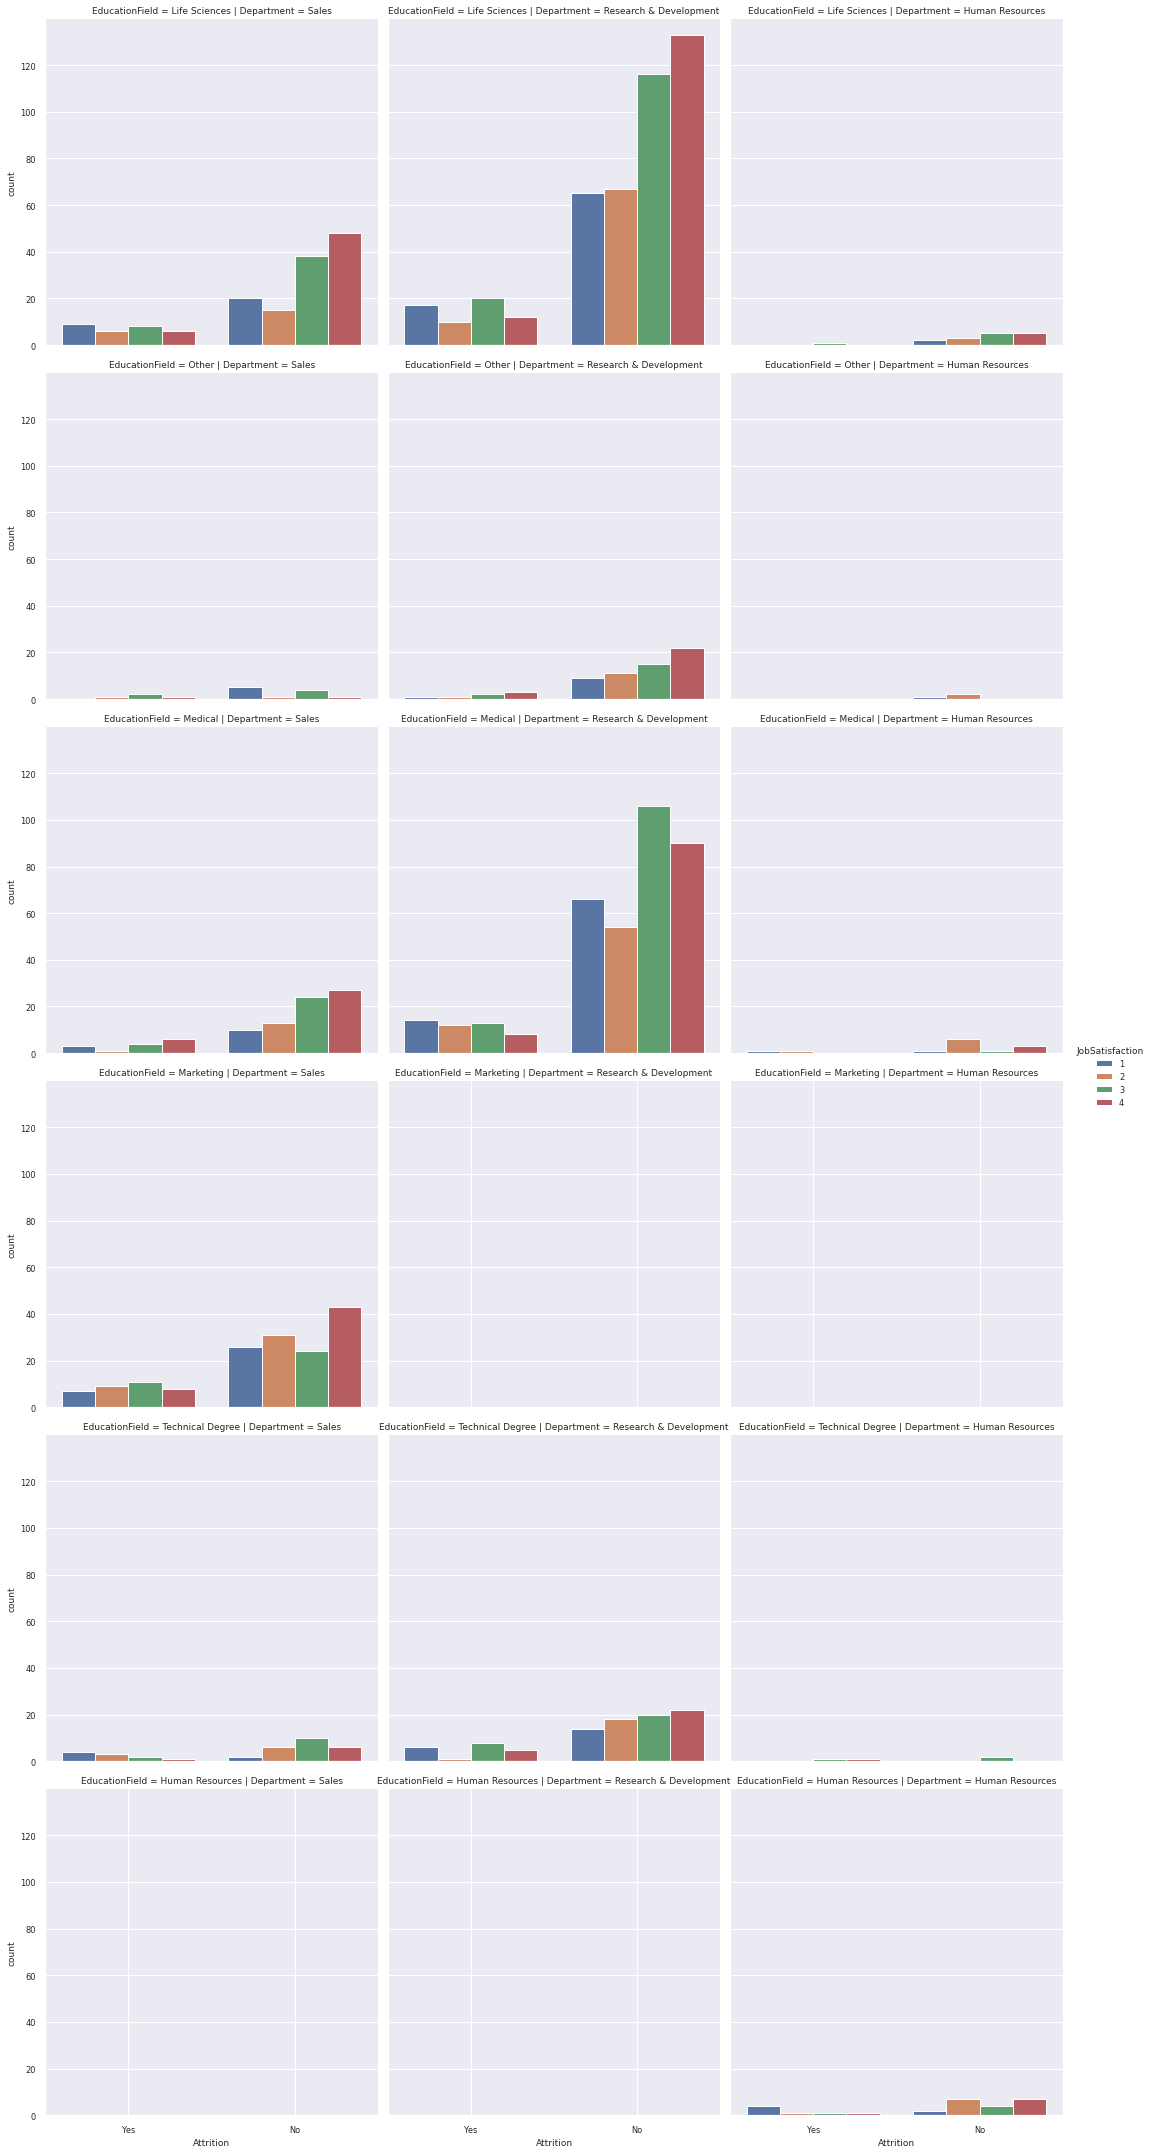

In [35]:
sns.set_theme(style="darkgrid", font_scale = 0.75)
g = sns.catplot(x = "Attrition",hue = 'JobSatisfaction', row = 'EducationField', col = 'Department', data = df, kind = 'count', ci = None)

In [36]:
dfNJS = dfN.loc[dfN['JobSatisfaction'] < 2]
dfNJS.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_decade,Age_decade
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,1,10,...,3,12,3,2,1,0,0,0,50s,50
15,29,No,Travel_Rarely,1389,Research & Development,21,Master,Life Sciences,1,20,...,1,10,1,3,10,9,8,8,20s,20
29,46,No,Travel_Rarely,705,Sales,2,Master,Marketing,1,38,...,0,22,2,2,2,2,2,1,40s,40
38,36,No,Travel_Rarely,852,Research & Development,5,Master,Life Sciences,1,51,...,1,6,3,4,1,1,0,0,30s,30
39,33,No,Travel_Frequently,1141,Sales,1,Bachelor,Life Sciences,1,52,...,2,10,3,3,5,3,1,3,30s,30


In [37]:
dfYJS = dfY.loc[dfY['JobSatisfaction'] < 2]
dfYJS.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_decade,Age_decade
21,36,Yes,Travel_Rarely,1218,Sales,9,Master,Life Sciences,1,27,...,0,10,4,3,5,3,0,3,30s,30
24,34,Yes,Travel_Rarely,699,Research & Development,6,Below College,Medical,1,31,...,0,8,2,3,4,2,1,3,30s,30
26,32,Yes,Travel_Frequently,1125,Research & Development,16,Below College,Life Sciences,1,33,...,0,10,5,3,10,2,6,7,30s,30
100,37,Yes,Travel_Rarely,807,Human Resources,6,Master,Human Resources,1,133,...,0,7,3,3,3,2,0,2,30s,30
140,32,Yes,Travel_Rarely,1033,Research & Development,9,Bachelor,Medical,1,190,...,0,10,2,4,5,4,0,4,30s,30


# **Now, we will try to find some insights on the employees whose jobsatisfaction is 1 and try to find possible insights**

**1. Business Travel**

In [38]:
dfNJS['BusinessTravel'].value_counts(normalize = True)

Travel_Rarely        0.766816
Travel_Frequently    0.156951
Non-Travel           0.076233
Name: BusinessTravel, dtype: float64

In [39]:
dfYJS['BusinessTravel'].value_counts(normalize = True)

Travel_Rarely        0.666667
Travel_Frequently    0.242424
Non-Travel           0.090909
Name: BusinessTravel, dtype: float64

**2. Distance from Home**

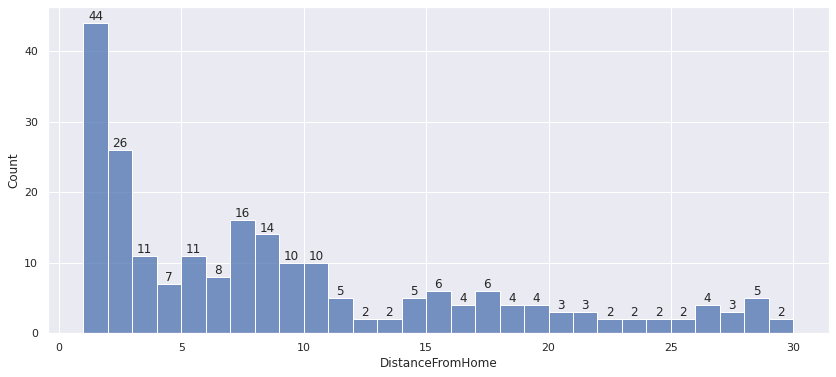

In [40]:
plt.figure(figsize=(14,6))
sns.set_theme(style = 'darkgrid', font_scale = 1)
ax = sns.histplot(data = dfNJS, x = dfNJS['DistanceFromHome'], binwidth = 1, binrange = (1,30), palette= 'rocket')
for i in ax.containers:
  ax.bar_label(i,)

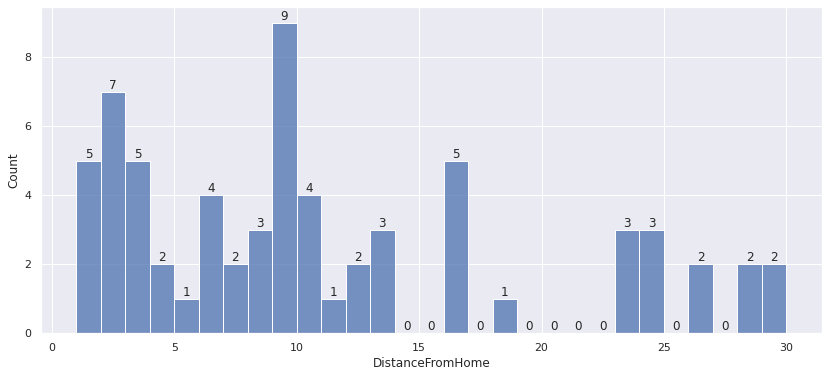

In [41]:
plt.figure(figsize=(14,6))
sns.set_theme(style = 'darkgrid', font_scale = 1)
ax = sns.histplot(data = dfYJS, x = dfYJS['DistanceFromHome'], binwidth = 1, binrange = (1,30), palette= 'rocket')
for i in ax.containers:
  ax.bar_label(i,)

**It can be noted that, the employees who didn't leave the company and had job satisfaction less than 1, have to travel less from home. The employees who left the company had larger distance to be travelled, which could possibly be a reason for lower job satisfaction and hence a reason to quit the company.**

**3. Department**

In [42]:
dfNJS['Department'].value_counts(normalize = True)

Research & Development    0.690583
Sales                     0.282511
Human Resources           0.026906
Name: Department, dtype: float64

In [43]:
dfYJS['Department'].value_counts(normalize = True)

Research & Development    0.575758
Sales                     0.348485
Human Resources           0.075758
Name: Department, dtype: float64

**4. Environment Satisfaction**

In [44]:
dfNJS['EnvironmentSatisfaction'].value_counts(normalize = True)

3    0.349776
4    0.318386
2    0.183857
1    0.147982
Name: EnvironmentSatisfaction, dtype: float64

In [45]:
dfYJS['EnvironmentSatisfaction'].value_counts(normalize = True)

1    0.303030
3    0.242424
4    0.242424
2    0.212121
Name: EnvironmentSatisfaction, dtype: float64

**32% of the employees are employees who didn't leave the company and with job satisfaction level less than 1 had Environment satisfaction of less than 3.**

**50% of the employees are employees who left the company and with job satisfaction level less than 1 had Environment satisfaction of less than 3.**

**5. Job Role**

In [46]:
dfYJS['JobRole'].value_counts(normalize = True)

Laboratory Technician        0.303030
Sales Executive              0.242424
Research Scientist           0.196970
Sales Representative         0.106061
Human Resources              0.075758
Healthcare Representative    0.030303
Manufacturing Director       0.030303
Manager                      0.015152
Name: JobRole, dtype: float64

In [47]:
dfNJS['JobRole'].value_counts(normalize = True)

Sales Executive              0.237668
Research Scientist           0.183857
Laboratory Technician        0.161435
Manufacturing Director       0.107623
Healthcare Representative    0.107623
Manager                      0.089686
Research Director            0.067265
Sales Representative         0.022422
Human Resources              0.022422
Name: JobRole, dtype: float64

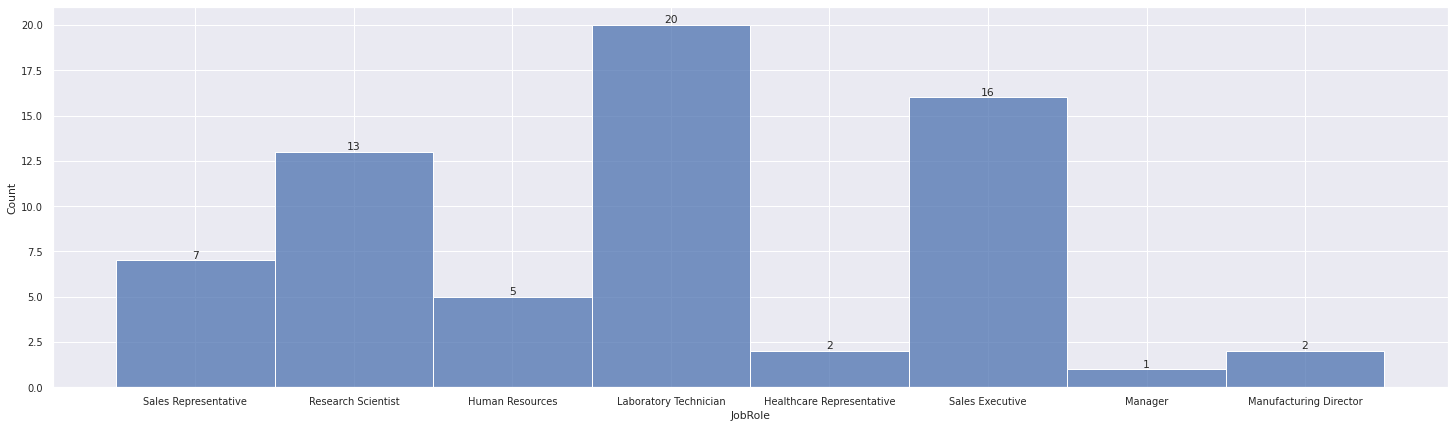

In [48]:
plt.figure(figsize=(25,7))
sns.set_theme(style = 'darkgrid', font_scale = .9)
ax = sns.histplot(data = dfYJS, x = dfYJS['JobRole'], palette= 'rocket')
for i in ax.containers:
  ax.bar_label(i,)

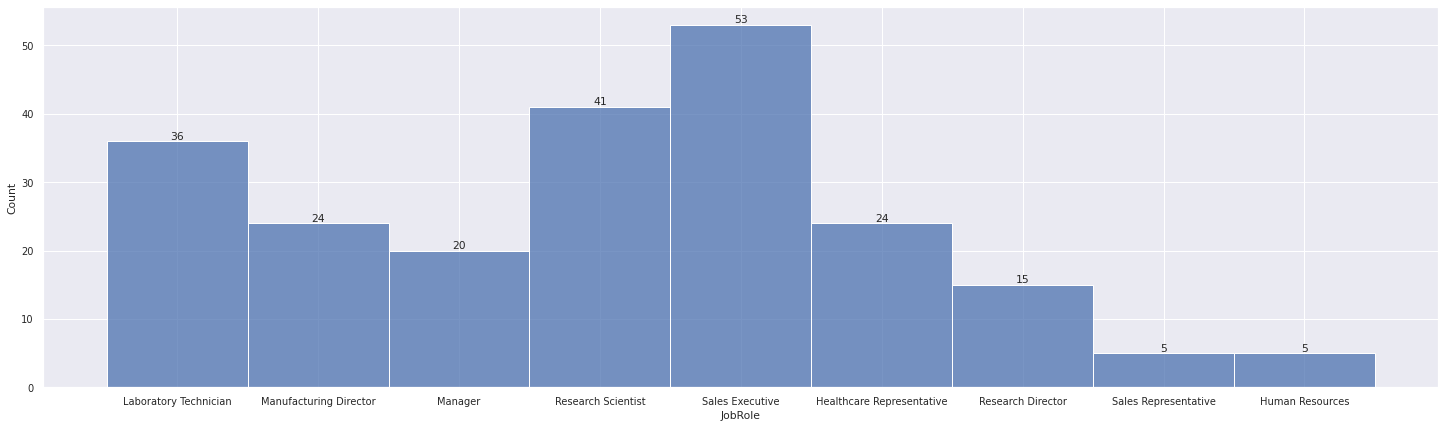

In [49]:
plt.figure(figsize=(25,7))
sns.set_theme(style = 'darkgrid', font_scale = .9)
ax = sns.histplot(data = dfNJS, x = dfNJS['JobRole'], palette= 'rocket')
for i in ax.containers:
  ax.bar_label(i,)

In [50]:
dfYJS.groupby(['JobRole'])['EnvironmentSatisfaction'].value_counts(normalize=True)

JobRole                    EnvironmentSatisfaction
Healthcare Representative  2                          1.000000
Human Resources            2                          0.400000
                           1                          0.200000
                           3                          0.200000
                           4                          0.200000
Laboratory Technician      1                          0.450000
                           3                          0.250000
                           2                          0.150000
                           4                          0.150000
Manager                    4                          1.000000
Manufacturing Director     3                          0.500000
                           4                          0.500000
Research Scientist         1                          0.307692
                           4                          0.307692
                           3                          0.230769
    

1. Almost 54% of the employees with job satisfaction less than 1 and who left the company were Laboratory Technician and Sales Executives
1. Even for those employees with Job satisfaction less than 1 and who didn't leave the company, Lab technician and Sales Executives comprise of 40%.
1. 60% of Lab Technicians have environment satisfaction of less than 3 and 56% of sales executives have enovironment satisfaction of less than 3
1. Hence it can be concluded that these two job roles are the least desired at the company

**4. Years with current manager**

In [51]:
dfNJS['YearsWithCurrManager'].value_counts(normalize = True)

2     0.215247
7     0.156951
0     0.121076
3     0.116592
8     0.076233
4     0.062780
9     0.044843
1     0.040359
5     0.040359
10    0.026906
11    0.022422
12    0.022422
6     0.017937
13    0.013453
17    0.013453
16    0.008969
Name: YearsWithCurrManager, dtype: float64

In [52]:
dfYJS['YearsWithCurrManager'].value_counts(normalize = True)

0     0.378788
2     0.227273
7     0.121212
3     0.090909
4     0.060606
14    0.030303
9     0.030303
1     0.015152
6     0.015152
10    0.015152
8     0.015152
Name: YearsWithCurrManager, dtype: float64

**More than 55% of the employees left the company within 2 years with the current manager. It could be theorised that if these employees worked with a certain group of managers who couldn't pass on the company ethos to the employees. These managers could be tracked upon and necessary trainings could be provided.**

**The Sales executives and Lab technicians are the employees who form a large chunk of employees with least job satisfaction. Necessary steps can be taken to better the enovironment these two role groups work in. Certain managerial role candidates also need to be identified and checked for furhter trends. Employees needing to travel long tend to leave the company than compared to employees who need to travel less.**

# 7. Conclusion

### The above dataset has many variables using which one can find detailed insights provided right questions are asked and obervations are made.More insigths can be extracted from the dateset depending on the questions we ask and the problems that persist.